In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Load Iris Dataset
# load through url
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris = pd.read_csv(url, names = attributes)
iris.columns = attributes
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris.to_csv('Iris.csv', index = False, header = True)

In [17]:
# Split up data for test and training before doing EDA on training set
iris_train, iris_test = train_test_split(iris, test_size = 0.3, stratify = iris['class'], random_state = 3)

Text(0.5, 0, 'class')

<Figure size 4320x2160 with 0 Axes>

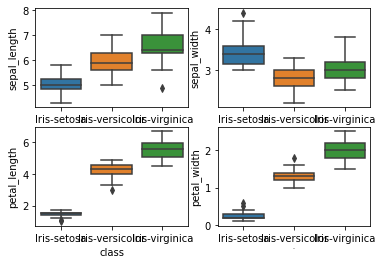

In [18]:
# Check distributions of data and see if there are any huge outlying values prior to modeling
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (60,30))
fig, axs = plt.subplots(2,2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.boxplot(x = 'class', y = 'sepal_length', data = iris_train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'class', y = 'sepal_width', data = iris_train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'class', y = 'petal_length', data = iris_train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'class', y = 'petal_width' , data = iris_train, order = cn, ax = axs[1,1]);
plt.xlabel('class',fontsize = 0.5)

#Overall, the data looks like there aren't many outliers except for setosa and versicolor in petal width

In [19]:
X_train = iris_train[['sepal_length','sepal_width','petal_length','petal_width']]
Y_train = iris_train['class']

X_test = iris_test[['sepal_length','sepal_width','petal_length','petal_width']]
Y_test = iris_test['class']

In [20]:
# Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
mod_lr = LogisticRegression()
mod_lr = mod_lr.fit(X_train,Y_train)
prediction=mod_lr.predict(X_test)
predictiontrain = mod_lr.predict(X_train)
print('The accuracy of the Logistic Regression is',"{:.3f}".format(metrics.accuracy_score(prediction,Y_test)))
print('The accuracy of the Logistic Regression training set is',"{:.3f}".format(metrics.accuracy_score(predictiontrain,
                                                                                                      Y_train)))

The accuracy of the Logistic Regression is 0.933
The accuracy of the Logistic Regression training set is 0.981


In [25]:
# Classification Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
DT_model = DecisionTreeClassifier(max_depth = 3, random_state = 5)
DT_model = model.fit(X_train,Y_train)
model_predict_train = DT_model.predict(X_train)
model_predict = DT_model.predict(X_test)
print('Accuracy of Test Set:',"{:.3f}".format(metrics.accuracy_score(model_predict,Y_test)))
print('Accuracy of Train Set:',"{:.3f}".format(metrics.accuracy_score(model_predict_train,Y_train)))

Accuracy of Test Set: 0.911
Accuracy of Train Set: 0.981


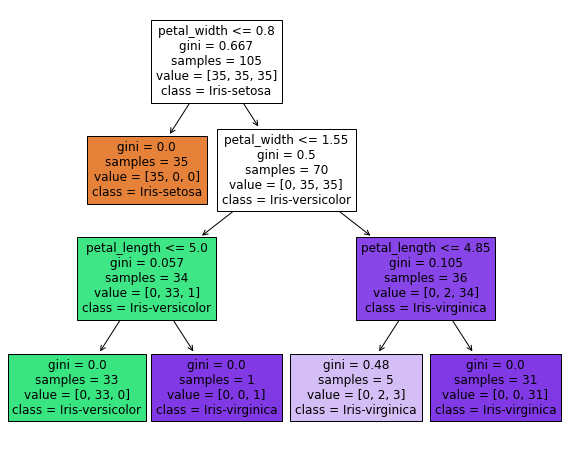

In [22]:
# Plot tree
import matplotlib.pyplot as plt
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.figure(figsize = (10,8))
plot_tree(model, feature_names = fn, class_names = cn, filled = True);

In [26]:
# Set up tree model/logistic regression model for use in Flask app
pickle.dump(DT_model, open('C://Users//JCCLI//Downloads//Treemodel.pickle', 'wb'))

In [13]:
# Dump the trained decision tree classifier with Pickle
decision_tree_pkl_filename = 'Classmodel.pkl'
# Open the file to save as pkl file
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')
pickle.dump(model, decision_tree_model_pkl)
